In [14]:
import parallelPermutationTest as ppt
import numpy as np
from plots import timePlotSNS

### Get synthetic data

In [15]:
path = "figures/memoryAllocation"

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [83]:
N = list(range(10,550,10))
bins = [64,128,256]
n_samples  = 5
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

rep_N = N*n_samples

In [84]:
def memoryAllocation_N(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemNList = list()
    for b in bins:
        memList = list()
        for _ in range(n_samples):
            for n in N:
                A = np.asarray(data_generator(mean, std, n, 1))
                B = np.asarray(data_generator(mean, std, n, 1))
        
                memList.append(ppt.GreenFloatCuda_memcheck(A,B, b, return_info_dict=True)["memory_MIB"])
        
        allMemNList.append(memList)
    
    return allMemNList

In [85]:
%%capture
allMemNList = memoryAllocation_N(variables, data_generator)

In [86]:
namesList= [r"$n_{w}=64$", r"$n_{w}=128$", r"$n_{w}=256$"]

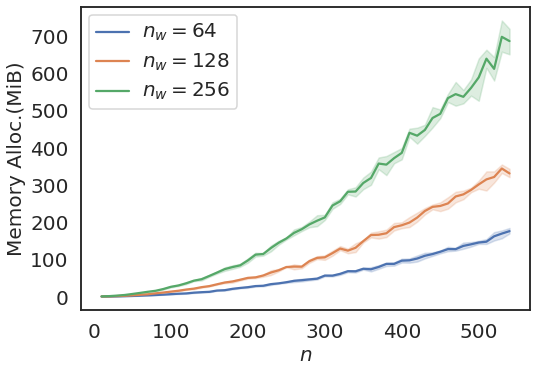

In [87]:
timePlotSNS(allMemNList,namesList,rep_N, "Memory Alloc.(MiB)",r"$n$", path="./figures/experiment4/MemAlloc_N")

In [90]:
N = [125, 250, 500]
bins = list(range(10,400+2,2))
n_samples  = 5
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

rep_bins = bins * n_samples

In [91]:
def memoryAllocation_Bins(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemSList = list()
    for n in N:
        memList = list()
        for _ in range(n_samples):
            for b in bins:
                A = np.asarray(data_generator(mean, std, n, 1))
                B = np.asarray(data_generator(mean, std, n, 1))
        
                memList.append(ppt.GreenFloatCuda_memcheck(A,B, b,return_info_dict=True)["memory_MIB"])
        allMemSList.append(memList)
    return allMemSList
        

In [92]:
%%capture
allMemSList = memoryAllocation_Bins(variables, data_generator)

In [93]:
nameList = [r"$n=125$", r"$n=250$", r"$n=500$"]

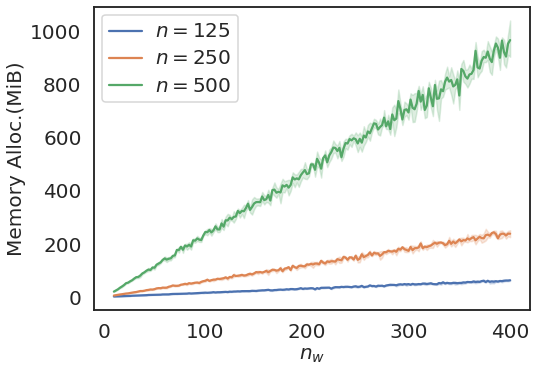

In [94]:
timePlotSNS(allMemSList,nameList,rep_bins, "Memory Alloc.(MiB)",r"$n_{w}$", path="./figures/experiment4/MemAlloc_Bins")